<a href="https://colab.research.google.com/github/mdnasiruddin733/ann-thesis/blob/main/final_120_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Steps to be follwed:**
> 

*   Import necessary packages
*   Load Data
*   Define Keras Model
*   Compile Keras Model
*   Fit Keras Model
*   Evaluate Keras Model
*   Make Predictions


















In [224]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Importing necessary packages and modules**


In [225]:
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np


## **Loading data from our data.csv file** 

In [226]:
url="/content/drive/MyDrive/datasets/data.csv"
df=pd.read_csv(url)
print(df)

     sand   silt   clay  ll  pl
0    11.1  66.33  22.58  31  20
1     7.3  70.17  22.52  36  24
2    11.1  64.04  24.87  38  23
3     1.6  79.00  19.39  39  28
4     7.3  71.07  21.63  37  25
..    ...    ...    ...  ..  ..
115  48.8  44.07   7.13  48  25
116   2.6  63.52  33.88  38  21
117   3.0  73.42  23.58  45  23
118  20.6  64.57  14.82  35  20
119  27.3  49.77  22.94  30  16

[120 rows x 5 columns]


## **Splitting dataset into input and output columns** 

In [227]:

input_col=df.iloc[:,0:3]
output_col=df.iloc[:,3:5]

print(output_col)

     ll  pl
0    31  20
1    36  24
2    38  23
3    39  28
4    37  25
..   ..  ..
115  48  25
116  38  21
117  45  23
118  35  20
119  30  16

[120 rows x 2 columns]


# **Splitting Training and Testing Data**


In [228]:
x_train,x_test,y_train,y_test=train_test_split(input_col,output_col,test_size=0.20)

## **Defining and compiling keras model** 

In [243]:

#defining layers
model = Sequential()
model.add(Dense(units=5,kernel_initializer='normal', activation='relu'))
model.add(Dense(units=5,kernel_initializer='normal', activation='relu'))
model.add(Dense(units=5,kernel_initializer='normal', activation='relu'))
model.add(Dense(units=5,kernel_initializer='normal', activation='relu'))
model.add(Dense(2,activation="linear"))


# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam',metrics=["mse"])
 
model.fit(x_train, y_train ,epochs = 200, batch_size=20, verbose=0)
y_true = np.array(y_test)
y_pred = np.array(model.predict(x_test))



In [244]:
SSE=np.sum((y_test-y_pred)**2)
SST=np.sum((y_test-np.mean(y_test))**2)
r_squared=1-(SSE/SST)
print(r_squared)



ll    0.552426
pl    0.372379
dtype: float64


# **Predicting model**


In [231]:
df2=pd.DataFrame()
df2["sand"]=x_test['sand']
df2["silt"]=x_test['silt']
df2["clay"]=x_test['clay']
df2["ll"]=y_test['ll']
df2["predicted_ll"]=y_pred[:,0]
df2["pl"]=y_test['pl']
df2["predicted_pl"]=y_pred[:,1]

print(df2)


     sand   silt   clay  ll  predicted_ll  pl  predicted_pl
22    3.0  57.50  39.49  44     44.765385  23     25.034437
48    8.1  53.53  38.37  44     43.206944  19     24.162802
45    8.3  54.14  37.56  34     42.975292  19     24.033401
13    2.9  76.00  21.10  37     41.042973  26     22.959158
94   34.1  55.94   9.96  40     31.797024  22     17.789890
72    4.4  45.54  50.06  53     46.759640  26     26.147476
40    9.0  66.04  24.96  43     39.992477  23     22.367798
78    1.5  48.03  50.47  44     47.597374  26     26.616070
63    2.0  48.16  49.84  56     47.328533  31     26.465820
47    1.2  41.67  57.13  55     49.155991  27     27.486380
86    2.4  55.39  42.21  48     45.528419  23     25.460644
15    1.9  72.29  25.81  37     42.245346  26     23.629862
79   20.7  58.34  20.96  31     36.090847  20     20.185919
114  65.1  26.03   8.87  23     29.675573  15     16.632961
92   22.5  57.03  20.47  30     35.518482  21     19.865816
87    1.1  49.61  49.29  52     47.43788

**Graphs**


Text(0, 0.5, 'Plastic Limit')

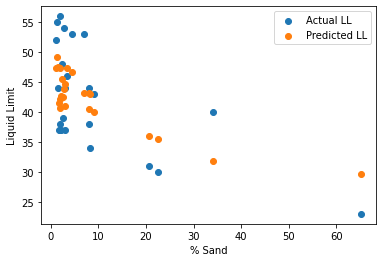

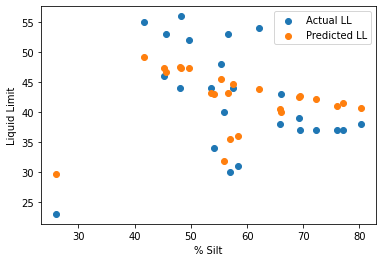

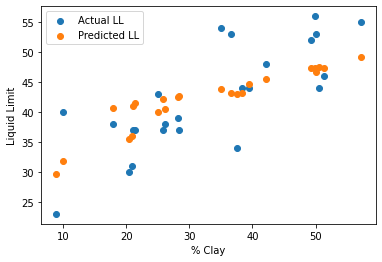

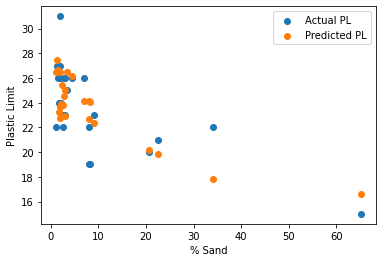

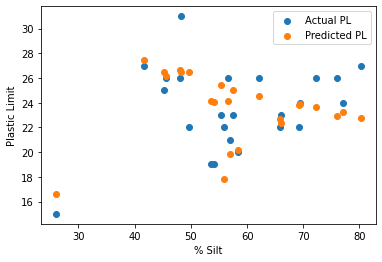

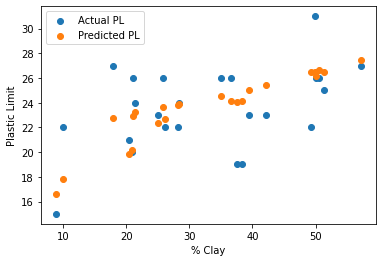

In [232]:
import matplotlib.pyplot as plt

fig1,sand=plt.subplots()
sand.scatter(df2['sand'],df2['ll'])
sand.scatter(df2['sand'],df2['predicted_ll'])
sand.legend(("Actual LL","Predicted LL"))
sand.set_xlabel("% Sand")
sand.set_ylabel("Liquid Limit")

fig2,silt=plt.subplots()
silt.scatter(df2['silt'],df2['ll'])
silt.scatter(df2['silt'],df2['predicted_ll'])
silt.legend(("Actual LL","Predicted LL"))
silt.set_xlabel("% Silt")
silt.set_ylabel("Liquid Limit")

fig3,clay=plt.subplots()
clay.scatter(df2['clay'],df2['ll'])
clay.scatter(df2['clay'],df2['predicted_ll'])
clay.legend(("Actual LL","Predicted LL"))
clay.set_xlabel("% Clay")
clay.set_ylabel("Liquid Limit")


# Plastic Limit
fig1,sand=plt.subplots()
sand.scatter(df2['sand'],df2['pl'])
sand.scatter(df2['sand'],df2['predicted_pl'])
sand.legend(("Actual PL","Predicted PL"))
sand.set_xlabel("% Sand")
sand.set_ylabel("Plastic Limit")

fig2,silt=plt.subplots()
silt.scatter(df2['silt'],df2['pl'])
silt.scatter(df2['silt'],df2['predicted_pl'])
silt.legend(("Actual PL","Predicted PL"))
silt.set_xlabel("% Silt")
silt.set_ylabel("Plastic Limit")

fig3,clay=plt.subplots()
clay.scatter(df2['clay'],df2['pl'])
clay.scatter(df2['clay'],df2['predicted_pl'])
clay.legend(("Actual PL","Predicted PL"))
clay.set_xlabel("% Clay")
clay.set_ylabel("Plastic Limit")


